<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Информация-по-первой-таблице" data-toc-modified-id="Информация-по-первой-таблице-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Информация по первой таблице</a></span></li><li><span><a href="#Информация-по-второй-таблице" data-toc-modified-id="Информация-по-второй-таблице-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Информация по второй таблице</a></span></li><li><span><a href="#Информация-по-третьей-таблице" data-toc-modified-id="Информация-по-третьей-таблице-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Информация по третьей таблице</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Третий регион</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.  
**Задача проекта:** Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:  

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;  
- Строят модель и оценивают объём запасов;  
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;  
- Прибыль равна суммарной прибыли отобранных месторождений.  

# Описание данных:  

`id` — уникальный идентификатор скважины;  
`f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);  
`product` — объём запасов в скважине (тыс. баррелей).  

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def info(df):
    print('Вывод таблицы')
    display(df.head())
    print('Просмотр информации')
    print(' ')
    display(df.info())
    print('Количество пропусков в столбцах')
    display(df.isna().sum())
    print(' ')
    print('Количество явных дубликатов', df.duplicated().sum())
    print(' ')
    print('Количество неявных дубликатов', df['id'].duplicated().sum())
    pd.plotting.scatter_matrix(df, figsize=(5,5))
    plt.suptitle('Матрица диаграмм рассеяния')
    plt.show()
    sns.heatmap(df.corr(), annot=True)
    plt.title('Матрица корреляции признаков')

### Информация по первой таблице

Вывод таблицы


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Просмотр информации
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество пропусков в столбцах


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

 
Количество явных дубликатов 0
 
Количество неявных дубликатов 10


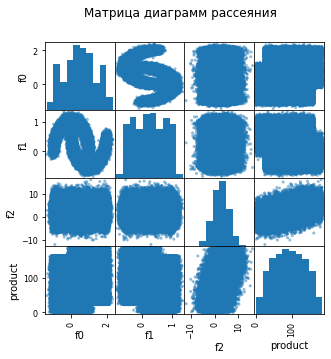

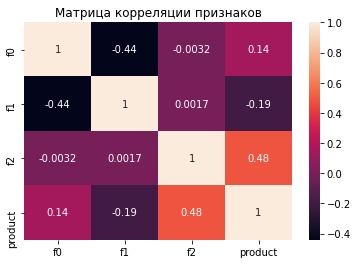

In [4]:
info(df1)

### Информация по второй таблице

Вывод таблицы


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Просмотр информации
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество пропусков в столбцах


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

 
Количество явных дубликатов 0
 
Количество неявных дубликатов 4


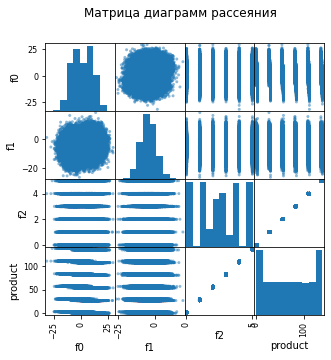

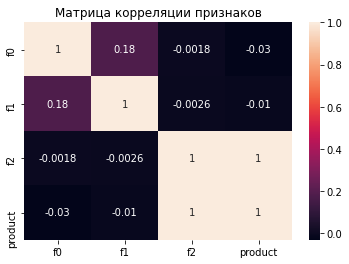

In [5]:
info(df2)

### Информация по третьей таблице

Вывод таблицы


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Просмотр информации
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество пропусков в столбцах


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

 
Количество явных дубликатов 0
 
Количество неявных дубликатов 4


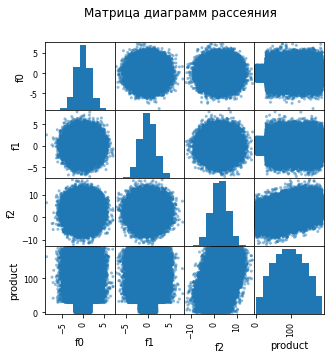

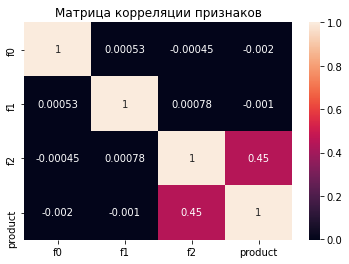

In [6]:
info(df3)

In [7]:
def drop(df):
    df.drop_duplicates('id', inplace = True)
    df.reset_index(drop=True)
    return df1['id'].duplicated().sum()

In [8]:
drop(df1)

0

In [9]:
drop(df2)

0

In [10]:
drop(df3)

0

# Вывод

1. Все таблицы одинакогового размера, состоят из 100000 строк и 5 столбцов, один из которых типа object осталные типа float. Пропусков нет. Выявлено менее 1% дубликатов, которые в последствии были удалены.  
2. В таблице по первому региону прослеживается слабая зависимость (см. таблицу) между признаком `f2` и целевым признаком, а также видна слабая отрицательная корреляция между признаками `f0` и `f1`.  
3. В таблице по второму региону выявлена очень высокая корреляция (1) между признаком `f2` и целевым признаком.  
4. В таблице по третьему региону также как у первой просматривается слабая зависимость между признаком `f2` и целевым признаком.  

## Обучение и проверка модели

### Первый регион

In [11]:
def x_y(df):
    
    '''Функция разделяет на признаки и целевой признак 
    и далее делит на тренировочную и тестовую выборки в пропорции 75:25'''
    
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)
    print(features_train.shape)
    print(target_train.shape)
    print(features_valid.shape)
    print(target_valid.shape)
    return features_train, features_valid, target_train, target_valid
    

features_train_1, features_valid_1, target_train_1, target_valid_1 = x_y(df1)

(74992, 3)
(74992,)
(24998, 3)
(24998,)


In [12]:
def model(features_train, features_valid, target_train, target_valid):
    
    '''Функция принимает на вход тренировочные и тестовые X и y,
    обучает модель линейной регрессии и выдает предсказания и расчет rmse'''
    
    model = LinearRegression().fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions_valid)**0.5
    print(f'Средний запас сырья: {predictions_valid.mean():2f} тыс. баррелей')
    print(f'RMSE модели на валидационной выборке: {rmse:.2f}')
    return predictions_valid, rmse

In [13]:
predictions_valid_1, rmse_1 = model(features_train_1, features_valid_1, target_train_1, target_valid_1)

Средний запас сырья: 92.789156 тыс. баррелей
RMSE модели на валидационной выборке: 37.85


### Второй регион

In [14]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = x_y(df2)

(74997, 3)
(74997,)
(24999, 3)
(24999,)


In [15]:
predictions_valid_2, rmse_2 = model(features_train_2, features_valid_2, target_train_2, target_valid_2)

Средний запас сырья: 69.178320 тыс. баррелей
RMSE модели на валидационной выборке: 0.89


### Третий регион

In [16]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = x_y(df3)

(74997, 3)
(74997,)
(24999, 3)
(24999,)


In [17]:
predictions_valid_3, rmse_3 = model(features_train_3, features_valid_3, target_train_3, target_valid_3)

Средний запас сырья: 94.865725 тыс. баррелей
RMSE модели на валидационной выборке: 40.08


# Вывод

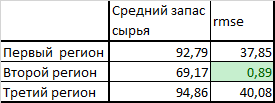

Как видно из таблицы, наиболее высокие показатели среднего запаса сырья у первого и третьего регионов, но и значение средней квадратичной ошибки тоже высоки. У второго региона запас меньше, но и ошибка минимальна.

## Подготовка к расчёту прибыли

In [20]:
WELLS = 500 # количество исследуемых точек
TOP_WELLS = 200 # количество лучших из них
INVESTMENTS = 10000000000 # бюджет на разработку скважин в регионе
INCOME_PER_UNIT = 450000 #стоимость единицы сырья; 1 единица = 1000 баррелей, стоимость одного барреля 450
INTERVAL = 0.95 #доверительный интервал
ENOUGH_RAW = INVESTMENTS/TOP_WELLS/INCOME_PER_UNIT
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {ENOUGH_RAW:.2f} тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


In [21]:
print(f'Средний запас сырья в первом регионе: {predictions_valid_1.mean():.2f} тыс. баррелей')
print(f'Средний запас сырья в первом регионе: {predictions_valid_2.mean():.2f} тыс. баррелей')
print(f'Средний запас сырья в первом регионе: {predictions_valid_3.mean():.2f} тыс. баррелей')

Средний запас сырья в первом регионе: 92.79 тыс. баррелей
Средний запас сырья в первом регионе: 69.18 тыс. баррелей
Средний запас сырья в первом регионе: 94.87 тыс. баррелей


# Вывод:
Достаточный объем сырья для безубыточной разработки новой скважины составляет 111 тыс. баррелей. Как видно из расчетов, ни один из вышепредставленных регионов этому объему не соответствует

## Расчёт прибыли и рисков 

In [22]:
def profit(target, predictions):
    
    profit = 0
    pred_sorted = predictions.sort_values(ascending=False).head(TOP_WELLS)
    selected = target[pred_sorted.index][:TOP_WELLS]
    
    for well in selected:
        profit += (well-ENOUGH_RAW)*INCOME_PER_UNIT
        
    return profit

In [29]:
def bootstrep(target, predictions):
    
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(1000):
        target_subsample = target.sample(n=WELLS, random_state=state, replace=True)
        probs_subsample = (pd.Series(predictions, index=target.index))[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))
        
    values = pd.Series(values)
    lower = values.quantile(0.025)/1000000
    upper = values.quantile(0.975)/1000000
    confidence_interval = st.t.interval(INTERVAL, len(values)-1, values.mean(), values.sem())
    mean = values.mean()/1000000
    risk = (values < 0).mean()
    
    print(f'Средняя выручка: {mean:.2f} млн. руб.')
    print(f'95% доверительный интервал от {lower:.2f} млн. руб до {upper:.2f} млн. руб.')
    print(f'Среднее с вероятностью 95% находится в этом интервале {confidence_interval}')
    print(f'Риск убытка: {risk:.1%}')

In [30]:
bootstrep(target_valid_1, predictions_valid_1)

Средняя выручка: 409.43 млн. руб.
95% доверительный интервал от -131.54 млн. руб до 944.40 млн. руб.
Среднее с вероятностью 95% находится в этом интервале (392436312.2689622, 426419764.9739091)
Риск убытка: 7.1%


In [31]:
bootstrep(target_valid_2, predictions_valid_2)

Средняя выручка: 536.90 млн. руб.
95% доверительный интервал от 114.53 млн. руб до 970.79 млн. руб.
Среднее с вероятностью 95% находится в этом интервале (523348898.586955, 550456276.387961)
Риск убытка: 0.9%


In [32]:
bootstrep(target_valid_3, predictions_valid_3)

Средняя выручка: 353.79 млн. руб.
95% доверительный интервал от -159.19 млн. руб до 875.65 млн. руб.
Среднее с вероятностью 95% находится в этом интервале (336935105.90829766, 370645619.55358577)
Риск убытка: 10.2%


# Вывод:
Риск убытка менее 2,5% имеет второй регион (0,9%)и также у него самая большая средняя выручка 536,90 млн. руб. Исходя из этих данных второй регион подходит для реализации проекта по разработке.